# Generative Model for Wine Tasting Notes

## Overview

This notebook contains the data scrapping portion of my NLP Project to create a language generation model capable of producting a wine tasting note based on an initial seed. More detailed information can be found in the Data Cleaning and EDA notebook.

Various models will be trained on the datasets of wine tasting notes, small and large, to see if they are able to generate text:
 - Model 1 - Simple model on the small dataset
 - Model 2 - LSTM models on small dataset
 - Model 3 - Base model on the large dataset
 - Model 4 - Encoder Block on the large dataset
 - Model 5 - DistilGPT 2 - Pretrain model - on the large dataset

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import pickle

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
wine_df = pd.read_csv('wine_df_small.csv').drop(columns = 'Unnamed: 0')

In [3]:
for row in wine_df.index:
    wine_df['wine_notes'][row] = re.sub('\—[a-zA-Z]+', '', wine_df['wine_notes'][row])

In [4]:
wine_notes = [x.lower() + '<end>' for x in wine_df['wine_notes']]

In [5]:
tokenizer = Tokenizer()

corpus = wine_notes

In [6]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'cases': 2, 'the': 3, 'with': 4, 'of': 5, 'a': 6, 'through': 7, 'end': 8, 'made': 9, 'flavors': 10, 'now': 11, 'drink': 12, 'finish': 13, 'imported': 14, 'this': 15, '000': 16, 'notes': 17, 'cherry': 18, 'from': 19, 'on': 20, 'acidity': 21, 'tannins': 22, 'black': 23, 'that': 24, 'to': 25, 'red': 26, 'best': 27, 'fruit': 28, 'by': 29, 'in': 30, 'are': 31, 'currant': 32, '1': 33, '500': 34, 'plum': 35, 'well': 36, 'spice': 37, 'tea': 38, 'accents': 39, 'is': 40, 'white': 41, 'cabernet': 42, 'expressive': 43, 'shows': 44, 'rich': 45, 'dark': 46, 'long': 47, 'vibrant': 48, '2022': 49, 'juicy': 50, '3': 51, 'blackberry': 52, '2': 53, 'fresh': 54, 'raspberry': 55, 'dried': 56, 'aromas': 57, '2023': 58, 'texture': 59, 'fine': 60, 'hints': 61, 'mineral': 62, 'medium': 63, 'polished': 64, 'licorice': 65, '4': 66, '2025': 67, 'but': 68, 'balanced': 69, 'richness': 70, 'violet': 71, 'refined': 72, 'apple': 73, 'details': 74, 'lemon': 75, 'sauvignon': 76, 'light': 77, 'anise': 78, 'liv

In [8]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [9]:
n_epochs = 20

model = Sequential()
model.add(Embedding(total_words, 2500, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

checkpoint_path = "/model_1/checkpoints/model_1.cpkt"

earlystop = EarlyStopping(monitor='accuracy', min_delta=0, patience=5, verbose=0, mode='auto')
checkpoints = ModelCheckpoint(
    filepath=checkpoint_path, monitor='accuracy', verbose=1, save_best_only=False,
    save_weights_only=False, mode='auto', save_freq='epoch',
)

history = model.fit(
    xs, 
    ys, 
    epochs=n_epochs, 
    verbose=1,
    callbacks = [earlystop, checkpoints],
    batch_size = 512
)

#print model.summary()
print(model)

Epoch 1/20
201/201 [==============================] - 1506s 7s/step - loss: 2.5098 - accuracy: 0.5160

Epoch 00001: saving model to /model_1/checkpoints\model_1.cpkt


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


Epoch 2/20
201/201 [==============================] - 1812s 9s/step - loss: 0.1116 - accuracy: 0.9813

Epoch 00002: saving model to /model_1/checkpoints\model_1.cpkt


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


Epoch 3/20
201/201 [==============================] - 1973s 10s/step - loss: 0.0383 - accuracy: 0.9895

Epoch 00003: saving model to /model_1/checkpoints\model_1.cpkt


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


Epoch 4/20
201/201 [==============================] - 1848s 9s/step - loss: 0.0334 - accuracy: 0.9895

Epoch 00004: saving model to /model_1/checkpoints\model_1.cpkt


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


Epoch 5/20
201/201 [==============================] - 1800s 9s/step - loss: 0.0322 - accuracy: 0.9896

Epoch 00005: saving model to /model_1/checkpoints\model_1.cpkt


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


Epoch 6/20
201/201 [==============================] - 1798s 9s/step - loss: 0.0308 - accuracy: 0.9895

Epoch 00006: saving model to /model_1/checkpoints\model_1.cpkt


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


Epoch 7/20
201/201 [==============================] - 1777s 9s/step - loss: 0.0304 - accuracy: 0.9896

Epoch 00007: saving model to /model_1/checkpoints\model_1.cpkt


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


Epoch 8/20
201/201 [==============================] - 2320s 12s/step - loss: 0.0302 - accuracy: 0.9895

Epoch 00008: saving model to /model_1/checkpoints\model_1.cpkt


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


Epoch 9/20
201/201 [==============================] - 2053s 10s/step - loss: 0.0298 - accuracy: 0.9895

Epoch 00009: saving model to /model_1/checkpoints\model_1.cpkt


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


Epoch 10/20
201/201 [==============================] - 2081s 10s/step - loss: 0.0297 - accuracy: 0.9894

Epoch 00010: saving model to /model_1/checkpoints\model_1.cpkt


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


INFO:tensorflow:Assets written to: /model_1/checkpoints\model_1.cpkt\assets


In [10]:
tf.keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [11]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

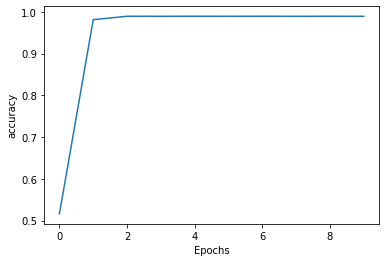

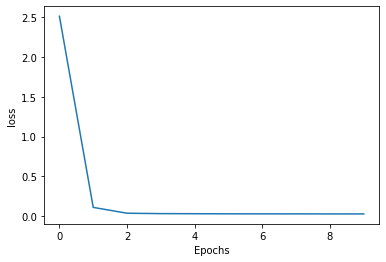

In [12]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [15]:
tokenizer.texts_to_sequences(['<end>'])

[[8]]

In [17]:
def tasting_note(seed_text, length):
    last_word = " "
    for _ in range(length):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predict_x=model.predict(token_list)
        classes_x=np.argmax(predict_x,axis=-1)
        for word, index in tokenizer.word_index.items():
            if index == classes_x:
                output_word = word
                break
        if index == 8:
            break
        seed_text += " " + output_word
    return seed_text

In [18]:
tasting_note('Aromatic', 50)

'Aromatic and beautiful harmonious with black tea notes that are in good harmony supported by light tannins and prominent acidity offers a beautiful mouthfeel that coats the palate and invites you back for another sip drink now through 2027 500 cases imported'

In [19]:
tasting_note('Lush', 50)

'Lush ripe style with açaí berry blueberry and plum reduction notes giving this a slightly exotic bent while singed bay leaf worn leather and warm tar accents keep this grounded in a slightly old school way displays ample heft yet energy ripples through the finish accompanied by lingering garrigue and tobacco'

In [20]:
tasting_note('Red Wine', 50)

'Red Wine with structure and presence buoyed by a complex backbone of minerality wrapped in refined dark cherry and black tea flavors and finishing with fine grained tannins best from 2021 through 2029 6 550 cases made'

In [21]:
tasting_note('Wine', 50)

'Wine with structure and presence buoyed by a complex backbone of minerality wrapped in refined dark cherry and black tea flavors and finishing with fine grained tannins best from 2021 through 2029 6 550 cases made'

In [22]:
tasting_note('Keyboard', 50)

'Keyboard and elegantly rich with a vibrant backbone of polished tannins and bright acidity wrapped in expressive raspberry and orange zest flavors with sandalwood and other zesty spice notes drink now through 2026 18 000 cases made'

In [23]:
tasting_note('Bukit Pasoh', 50)

'Bukit Pasoh and elegantly rich with a vibrant backbone of polished tannins and bright acidity wrapped in expressive raspberry and orange zest flavors with sandalwood and other zesty spice notes drink now through 2026 18 000 cases made'

In [24]:
model.save('model_1.h5')

In [25]:
model = tf.keras.models.load_model('model_1.h5')
max_sequence_len = 72

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 72, 2500)          2380000   
_________________________________________________________________
bidirectional (Bidirectional (None, 72, 300)           3181200   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300)               541200    
_________________________________________________________________
dense (Dense)                (None, 952)               286552    
Total params: 6,388,952
Trainable params: 6,388,952
Non-trainable params: 0
_________________________________________________________________
